# Creative Gaming: Uplift Modeling

* Team-lead GitHub userid: rsm-wez038
* Group name: group 20
* Team member names:
    - Wenpu Zhang
    - Lynn Li
    - Jessie Chen
    - Ran Ji

## Setup

Please complete this python notebook with your group by answering the questions in `cg-uplift-mdsba.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the second group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:


![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm

In [2]:
# run pip install --user pyrsm --upgrade to make sure you have the latest version
rsm.__version__

'0.9.18'

In [3]:
## loading the organic data - this dataset must NOT be changed
cg_organic_control = pd.read_parquet("data/cg_organic_control.parquet").reset_index(drop=True)
cg_organic_control.head()
cg_organic_control.shape

(30000, 20)

In [4]:
rsm.md("data/cg_organic_control_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")


In [5]:
## loading the treatment data - this dataset must NOT be changed
cg_ad_treatment = pd.read_parquet("data/cg_ad_treatment.parquet").reset_index(drop=True)
cg_ad_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
0,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
1,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
2,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
3,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
4,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0


In [6]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : cg_organic_control
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                     OR     OR%  coefficient  std.error  z.value p.value     
Intercept         0.018  -98.2%        -4.02      0.082  -48.956  < .001  ***
GameLevel         1.105   10.5%         0.10      0.011    9.102  < .001  ***
NumGameDays       1.032    3.2%         0.03      0.004    7.493  < .001  ***
NumGameDays4Plus  1.065    6.5%         0.06      0.006   11.159  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.036
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.651
Log-likelihood: -6315.137, AIC: 12638.275, BIC: 12671.511
Chi-squared: 465.178, df(3), p.value < 0.001 
Nr obs: 30,000


In [7]:
# load a custom python module
from utils.functions import example
example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## Part I: Uplift Modeling Using Machine Learning (38 points)

**1. Prepare the data (5 points):**

**a.  Add a variable “ad” to cg_ad_random and set its value to 1 for all rows**

In [8]:
cg_ad_random = pd.read_parquet("data/cg_ad_random.parquet")

In [9]:
cg_ad_random['ad'] = 1

In [10]:
cg_ad_random.head()
cg_ad_random.shape

(30000, 21)

**b.  Add a variable “ad” to cg_organic_control and set its value to 0 for all rows**

In [11]:
cg_organic_control['ad'] = 0

**c.  Create a stacked dataset for the uplift analysis by combining cg_organic_control (Group 1) and cg_ad_random (Group 2). Use cg_rct_stacked as the name for the stacked dataset.**

In [12]:
cg_rct_stacked = pd.concat([cg_organic_control, cg_ad_random], axis=0)
cg_rct_stacked.shape

(60000, 21)

**d.  Create a training variable and ensure the proportion of "yes" and "no" values is as close as possible across the 4 sub-sets of data (i.e., training and test for ad == 0 and training and test for ad == 1). Use 1234 as the seed. Use “converted” and “ad” as the blocking variables, in that order.**

Hint: Review the uplift demo code for an example of how to set this up.

In [13]:
cg_rct_stacked["training"] = rsm.model.make_train(
    data=cg_rct_stacked, test_size=0.3, strat_var=["converted", "ad"],random_state = 1234
)
pd.crosstab(cg_rct_stacked.converted, [cg_rct_stacked.ad, cg_rct_stacked.training]).round(2)

ad            0            1       
training    0.0    1.0   0.0    1.0
converted                          
yes         512   1194  1174   2739
no         8488  19806  7826  18261

**When ad is 0, there are 512 "yes" and 8488 "no" samples allocated to the training set.**

**When ad is 1, there are 1174 "yes" and 7826 "no" samples allocated to the training set.**

**For the test set (where the training column is 1.0), there are 1194 "yes" and 19806 "no" samples for ad equal to 0, and 2739 "yes" and 18261 "no" samples for ad equal to 1.**

**This cross-tabulation helps us understand how the samples are stratified by the values of "converted" and "ad" to ensure that the proportion of different combinations of samples remains consistent when splitting into the training and test sets. This is useful for evaluating whether different ads (ad) have an impact on the conversion rate and ensures that the training and test sets have similar distributions of data when assessing this impact.**

In [14]:
cg_rct_stacked.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad,training
0,no,7,18,0,124,0,81,0,yes,no,...,0,4,no,yes,3,2101,no,no,0,1.0
1,no,10,3,2,60,0,18,479,no,no,...,0,0,yes,no,7,1644,yes,no,0,1.0
2,no,2,1,0,0,0,0,0,no,no,...,0,2,no,no,8,3197,yes,yes,0,1.0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,yes,no,6,913,no,no,0,0.0
4,no,8,15,0,0,0,6,51,yes,no,...,2,1,yes,no,21,2009,yes,no,0,1.0


**e.  Check if the probability of yes/no is similar across the training and test sets for ad == 0 and ad == 1. The response rate does not have to be exactly the same in the ad == 0 and ad == 1 sections of the data. However, within ad == 0, the ratio of yes/no should be very similar for the training and test sets. Similarly, within ad == 1, the ratio of yes/no should be very similar for the training and test set.**

In [15]:
pd.crosstab(cg_rct_stacked.converted, [cg_rct_stacked.ad, cg_rct_stacked.training], normalize= 'columns').round(2)

ad            0           1      
training    0.0   1.0   0.0   1.0
converted                        
yes        0.06  0.06  0.13  0.13
no         0.94  0.94  0.87  0.87

**1. For ad = 0:**

**The probability of conversion (yes) is 6% both in the training and test sets.**
**The probability of not converting (no) is 94% in both the training and test sets.**

**2. For ad = 1:**

**The probability of conversion (yes) is 13% for both the training and test sets.**
**The probability of not converting (no) is 87% for both the training and test sets.**

**The data indicates that the stratification process has been successful in ensuring that the distribution of the 'converted' variable is consistent across both the training and test sets for each ad group. This is important for maintaining the integrity of any predictive modeling or A/B testing, as it ensures that the results are not biased by uneven distributions of outcomes in the training and test data。**

## 2

__Train an uplift model using Logistic Regression. Add the predicted scores for the  treatment and control models, i.e., pred_control and pred_treatment, to cg_rct_stacked (or add them to a separate DataFrame called pred_store) and calculate the uplift score. (3 points)__

In [16]:
cg_rct_stacked.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad,training
0,no,7,18,0,124,0,81,0,yes,no,...,0,4,no,yes,3,2101,no,no,0,1.0
1,no,10,3,2,60,0,18,479,no,no,...,0,0,yes,no,7,1644,yes,no,0,1.0
2,no,2,1,0,0,0,0,0,no,no,...,0,2,no,no,8,3197,yes,yes,0,1.0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,yes,no,6,913,no,no,0,0.0
4,no,8,15,0,0,0,6,51,yes,no,...,2,1,yes,no,21,2009,yes,no,0,1.0


In [17]:
lr_treatment = rsm.model.logistic(
    data={"cg_uplift": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cg_rct_stacked.loc[:, "GameLevel":"UserHasOldOS"].columns.tolist(),
)
lr_treatment.summary()

Logistic regression (GLM)
Data                 : cg_uplift
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.030  -97.0%        -3.52      0.122  -28.987  < .001  ***
AcquiredSpaceship[yes]       1.088    8.8%         0.08      0.049    1.732   0.083    .
AcquiredIonWeapon[yes]       0.917   -8.3%        -0.09      0.164   -0.533   0.594     
PurchasedCoinPackSmall[yes]  1.045    4.5%         0.04      0.046    0.960   0.337

In [18]:
lr_control= rsm.model.logistic(
    data={"cg_uplift": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cg_rct_stacked.loc[:, "GameLevel":"UserHasOldOS"].columns.tolist(),
)
lr_control.summary()

Logistic regression (GLM)
Data                 : cg_uplift
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.006  -99.4%        -5.18      0.193  -26.809  < .001  ***
AcquiredSpaceship[yes]       1.594   59.4%         0.47      0.072    6.472  < .001  ***
AcquiredIonWeapon[yes]       0.860  -14.0%        -0.15      0.267   -0.566   0.571     
PurchasedCoinPackSmall[yes]  1.029    2.9%         0.03      0.069    0.415   0.678

In [19]:
cg_rct_stacked['pred_treatment'] = lr_treatment.predict(cg_rct_stacked)['prediction']
cg_rct_stacked['pred_control'] = lr_control.predict(cg_rct_stacked)['prediction']

In [20]:
cg_rct_stacked["uplift_score"] = (
    cg_rct_stacked.pred_treatment - cg_rct_stacked.pred_control
)

**Note that uplift score is the difference between the predicted scores for the treatment and control models.**

**In this case, the 'uplift_score' is calculated by subtracting the predicted probability of the target outcome occurring in the control group (`cg_rct_stacked.pred_control`) from the predicted probability of the target outcome occurring in the treatment group (`cg_rct_stacked.pred_treatment`). This score measures the incremental impact of the treatment on the likelihood of the target outcome. A positive uplift score suggests that the treatment increases the probability of the target outcome, while a negative uplift score suggests a decrease. Therefore, the uplift model aims to identify the individuals for whom the treatment would be most effective, allowing for more targeted interventions.**


## 3

__Calculate the Uplift (%) and Incremental Uplift (%) for the uplift model (use 20 instead of the standard 10 groups) and plot performance metrics. Interpret the plots. (3 points)__
__Hint: Use functions from the pyrsm package to generate the uplift table (uplift_tab), the incremental uplift (inc_uplift_plot), and the uplift plot (uplift_plot).__

In [21]:
tab = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1,qnt = 20)
tab

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score,1,0.05,197,450,70,634,147.315457,1.636838,0.327368
1,uplift_score,2,0.10,309,900,99,1182,233.619289,2.595770,0.195969
2,uplift_score,3,0.15,428,1350,125,1686,327.911032,3.643456,0.212857
3,uplift_score,4,0.20,528,1800,152,2175,402.206897,4.468966,0.167007
4,uplift_score,5,0.25,594,2250,166,2684,454.842027,5.053800,0.119162
5,uplift_score,6,0.30,642,2700,183,3150,485.142857,5.390476,0.070186
6,uplift_score,7,0.35,681,3150,195,3658,513.080372,5.700893,0.063045
7,uplift_score,8,0.40,719,3600,200,4127,544.539133,6.050435,0.073783
8,uplift_score,9,0.45,756,4050,210,4577,570.179594,6.335329,0.060000
9,uplift_score,10,0.50,791,4500,231,5076,586.212766,6.513475,0.035694


pred: This might be an identifier for each prediction group, probably corresponding to deciles of the uplift score.

bins: Indicates the bins or groups into which the predictions have been divided. You used 20 bins instead of the standard 10.

cum_prop: Cumulative proportion of the sample. This is going from 0.05 (5%) to 1 (100%), indicating cumulative segments of the population.

T_resp: The number of responders in the treatment group.

T_n: The total number of individuals in the treatment group.

C_resp: The number of responders in the control group.

C_n: The total number of individuals in the control group.

incremental_resp: The incremental response, calculated as the difference in the proportion of responders between the treatment and control groups.

inc_uplift: Incremental uplift, which is the incremental response as a percentage of the number of individuals in the treatment group.

uplift: The uplift score, which represents the effectiveness of the treatment. It's calculated as the difference in response rates between the treatment and control groups.

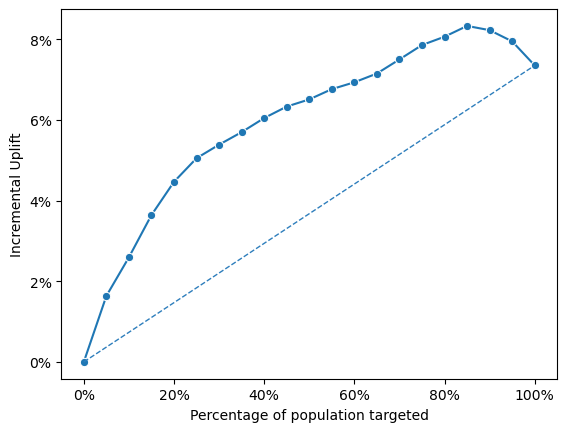

In [22]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20
)

**Interpretation:**\
Uplift Plot is incremental impact of a marketing campaign as more of the population is targeted. 

The x-axis represents the percentage of the population targeted, sorted by the predicted uplift score. Starting from the left, these are the customers most likely to be influenced by the campaign.

The y-axis shows the incremental uplift, which is the additional response rate attributed to the campaign.

The line increases as more of the population is targeted, peaking at around 60-80% of the population before it starts to plateau and slightly decrease.

This peak indicates the optimal point of targeting where the campaign has its maximum effectiveness. Beyond this point, targeting additional customers contributes less to the overall uplift.

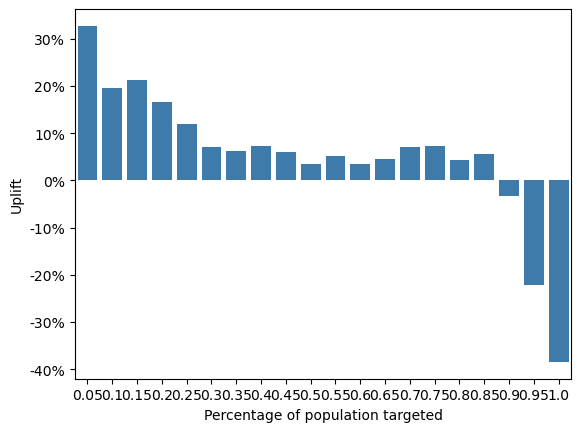

In [23]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20
)

**Interpretation:**\
This Uplift Plot shows the percentage uplift achieved by targeting different segments of the population, divided into percentiles based on the predicted influence of the campaign:
- The x-axis represents the population segments, likely sorted by the predicted uplift from least to most influenced.
- The y-axis shows the uplift percentage, which is the difference in response rate between the treated group and the control group for each segment.
- The bars represent the uplift for each segment, starting from the group that is least influenced by the campaign (left) to the most influenced (right).

From the plot, you can observe that:
- The initial segments show a positive uplift, which means the campaign is effective for these groups.
- The uplift decreases across the segments, indicating that the campaign becomes less effective for the later groups.
- Toward the right end, the bars go below zero, indicating a negative uplift for these segments. This suggests that the campaign might have a detrimental effect or that the control group is responding better than the treated group for these segments.

The insights from this plot suggest that the campaign should be targeted towards the leftmost segments, which show a positive uplift, and avoid the rightmost segments where the campaign could have a negative impact.

## 4

__Using the incremental_resp column from the performance metric table created through the uplift_tab function, calculate the incremental profit you expect to make if you targeted the best 30,000 customers of 120,000 using the uplift model. (3 points)__ 

__Hint: For every n-tile, the incremental_resp tells you how many incremental purchases were made when customers up to that n-tile were targeted. To extrapolate to the best 30,000 from 120,000, notice that there are a total of 9,000 customers who got the ad in cg_rct_stacked__ 

In [24]:
# Number of customers to target
target_customers = 30000

# Number of bins needed to cover 30,000 customers (since each bin has 900 customers)
bins_needed = target_customers / (120000 / 20)

# Incremental response for the 5th bin
incremental_response_bin_5 = tab['incremental_resp'][4]

# Number of customers in the 5th bin
customers_in_bin_5 = 2250  # 25% of 9000

# Calculate the total incremental response for 30,000 customers
total_incremental_response_30k = incremental_response_bin_5 * (target_customers / customers_in_bin_5)

# Assuming a profit margin per incremental purchase
margin_per_purchase = 14.99 
cost = 30000 * 1.5

# Calculate the total expected incremental profit for 30,000 customers
total_incremental_profit = total_incremental_response_30k * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit}")


Total expected incremental profit: 45907.75976154994


## 5

__Calculate the Uplift (%) and Incremental Uplift (%) you would get if you used a propensity model (use 20 instead of the standard 10 groups). Compare the performance metrics between the uplift and propensity models and interpret the differences. (3 points)__ 

__Hint: Use uplift and incremental uplift plots to compare the uplift and propensity models__

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


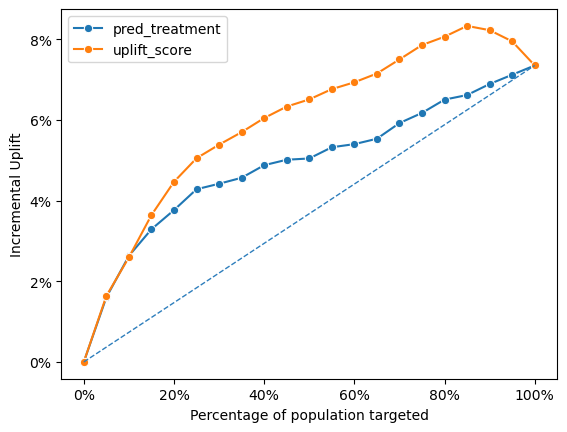

In [25]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
    qnt = 20
)

**Interpretation:**\
Explain the Incremental Uplift Plot:
- The x-axis represents the percentage of the population targeted, starting from 0% to 100%.
- The y-axis shows the incremental uplift, which is the additional benefit gained by targeting a specific percentile of the population.
- There are two lines in the plot:
- The blue line (pred_treatment) represents the predicted treatment effect from the Propensity Model.
- The orange line (uplift_score) represents the actual uplift from the Uplift Model.

Interpretation of the Plot:
- The Propensity Model's curve (blue) starts off with a higher incremental uplift at the lower percentiles. This suggests that initially, the Propensity Model identifies individuals who are more likely to respond positively to the treatment.
- The Uplift Model's curve (orange) begins lower but overtakes the Propensity Model's curve as more of the population is targeted. This indicates that while the Uplift Model may not identify the top responders as effectively initially, it performs better across a broader section of the population.
- Both curves plateau towards the end, which is typical as you target more of the population; the incremental benefits tend to decrease because you start to reach individuals less likely to be influenced by the campaign.

Calculation of Uplift and Incremental Uplift:
- Uplift (%) is typically calculated as the difference in conversion rates between the treatment group and the control group.
- Incremental Uplift (%) is the additional gain in uplift that each successive percentile provides over the previous one.
- The plot has divided the population into 20 groups (as per the instruction in the code snippet), which allows for a finer analysis compared to the standard 10 groups.

Comparing Performance Metrics:
- In the initial segments, the Propensity Model seems to perform better, suggesting that it's more accurate at identifying the individuals who are most likely to be influenced.
- In the broader segments, the Uplift Model seems to perform better, indicating that it's more stable and consistent across the general population.
- The differences might indicate that the Propensity Model is better for targeted marketing where only a small percentage of the population is to be targeted, while the Uplift Model is better for campaigns aiming at a wider audience.

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


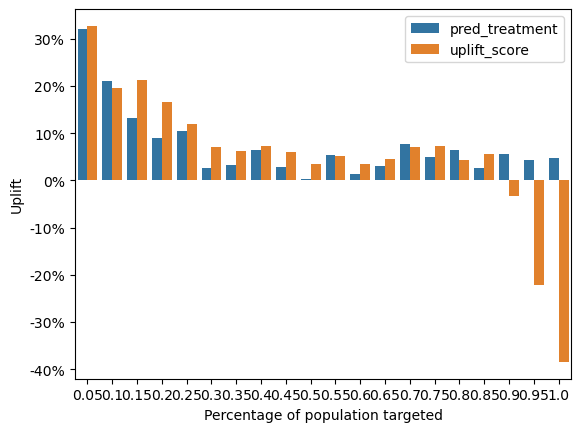

In [26]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
    qnt = 20
)

**Interpretation:**

This chart shows the incremental uplift for different segments of the population targeted, comparing the performance of two different scores - the propensity model (pred_treatment) and the uplift model (uplift_score). Interpretation of the chart is as follows:
1. The x-axis shows segments of the population targeted, expressed in cumulative percentages. These segments are likely based on the ranked probability of response to a treatment or intervention, with the leftmost bars representing the highest probability. The y-axis represents the uplift percentage, which indicates the increase or decrease in the response rate due to the treatment for each segment.
2. Each pair of bars for a given segment shows: 
- the predicted treatment effect (in blue) and the actual uplift achieved (in orange).
- Positive values indicate that the treatment had a positive impact on the segment, while negative values suggest that the treatment had a negative impact, possibly a deterrent effect.
3. The chart uses quantiles (qnt = 20), which means the population is divided into 20 equal parts. Each bar represents 5% of the population, ranked by the likelihood of being influenced by the treatment.

Comparison of Predicted vs. Actual Uplift:
- In the initial segments (left side of the chart), both the predicted treatment effect and the actual uplift are positive, suggesting that targeting these segments is beneficial.
- The predicted treatment effect consistently overestimates the uplift compared to the actual uplift score across almost all segments.
- In the latter segments (right side of the chart), the actual uplift becomes negative, which implies that targeting these segments could be counterproductive.

Implications:
- The initial segments show a higher uplift, so focusing on the top 10-20% might be the most effective strategy.
- The negative uplift in later segments indicates that indiscriminate targeting could lead to a waste of resources or even harm, as the treatment might dissuade people from the desired behavior.

## 6

__Using the incremental_resp column from the uplift table for the propensity model, calculate the incremental profit you would expect to make if you targeted the__ 
__best 30,000 customers of 120,000 using the propensity model. How much more do you expect to make from using an uplift rather than a propensity model? (3 points)__

In [27]:
tab_prop = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)
tab_prop

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment,1,0.05,204,450,80,603,144.298507,1.603317,0.320663
1,pred_treatment,2,0.10,326,900,112,1131,236.875332,2.631948,0.210505
2,pred_treatment,3,0.15,430,1350,159,1605,296.261682,3.291796,0.131955
3,pred_treatment,4,0.20,525,1800,206,1994,339.042126,3.767135,0.090288
4,pred_treatment,5,0.25,615,2250,239,2344,385.584471,4.284272,0.105714
5,pred_treatment,6,0.30,672,2700,285,2807,397.863912,4.420710,0.027315
6,pred_treatment,7,0.35,726,3150,316,3162,411.199241,4.568880,0.032676
7,pred_treatment,8,0.40,775,3600,336,3603,439.279767,4.880886,0.063537
8,pred_treatment,9,0.45,813,4050,361,4044,451.464392,5.016271,0.027755
9,pred_treatment,10,0.50,838,4500,386,4527,454.302187,5.047802,0.003796


In [28]:
# Number of customers to target
target_customers = 30000

# Number of bins needed to cover 30,000 customers (since each bin has 900 customers)
bins_needed = target_customers / (120000 / 20)

# Incremental response for the 5th bin
incremental_response_bin_5 = tab_prop['incremental_resp'][4]

# Number of customers in the 5th bin
customers_in_bin_5 = 2250  # 25% of 9000

# Calculate the total incremental response for 30,000 customers
total_incremental_response_30k = incremental_response_bin_5 * (target_customers / customers_in_bin_5)

# Assuming a profit margin per incremental purchase
margin_per_purchase = 14.99
cost = 30000 * 1.5

# Calculate the total expected incremental profit for 30,000 customers
total_incremental_profit_prop = total_incremental_response_30k * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_prop}")


Total expected incremental profit: 32065.48293515359


In [29]:
diff = abs(total_incremental_profit_prop - total_incremental_profit)
diff

13842.276826396352

## 7

__Repeat steps 2-6 using a Random Forest model. Tune the model on at least two hyper parameters (8 points)__ 
 


In [30]:
rf_treatment = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cg_rct_stacked.loc[:, "GameLevel":"UserHasOldOS"].columns.tolist()
)

rf_treatment.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 21,000
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.758

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship

In [31]:
rf_control = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cg_rct_stacked.loc[:, "GameLevel":"UserHasOldOS"].columns.tolist()
)

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 4, 0.2, 0.5, None]
}

scoring = {'AUC': 'roc_auc'}


rf_treatment_cv = GridSearchCV(
   rf_treatment.fitted, 
    param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=4,
    refit='AUC',
    verbose=5
)

rf_control_cv = GridSearchCV(
    rf_control.fitted, 
    param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=4,
    refit='AUC',
    verbose=5
)


rf_treatment_cv.fit(rf_treatment.data_onehot, rf_treatment.data.converted)  
rf_control_cv.fit(rf_control.data_onehot, rf_control.data.converted)

In [33]:
results_df_treatment = pd.DataFrame(rf_treatment_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC").reset_index(drop=True)
results_df_control = pd.DataFrame(rf_control_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC").reset_index(drop=True)
print(results_df_treatment)

In [34]:
print(results_df_control)

In [35]:
rf_treatment = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cg_rct_stacked.loc[:, "GameLevel":"UserHasOldOS"].columns.tolist(),
    n_estimators = 800,
    max_features = 4
)

rf_treatment.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 21,000
max_features         : 4 (4)
n_estimators         : 800
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.774

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship_ye

In [36]:
rf_control = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cg_rct_stacked.loc[:, "GameLevel":"UserHasOldOS"].columns.tolist(),
    n_estimators = 700,
    max_features = 0.2
)

rf_control.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 21,000
max_features         : 0.2 (0)
n_estimators         : 700
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.87

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship_y

In [37]:
cg_rct_stacked['pred_control_rf'] = rf_control.predict(cg_rct_stacked)['prediction']
cg_rct_stacked['pred_treatment_rf'] = rf_treatment.predict(cg_rct_stacked)['prediction']
cg_rct_stacked["uplift_score_rf"] = (
    cg_rct_stacked.pred_treatment_rf - cg_rct_stacked.pred_control_rf
)

cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,UserConsole,UserHasOldOS,ad,training,pred_treatment,pred_control,uplift_score,pred_control_rf,pred_treatment_rf,uplift_score_rf
0,no,7,18,0,124,0,81,0,yes,no,...,no,no,0,1.0,0.082031,0.018729,0.063302,0.004286,0.00875,0.004464
1,no,10,3,2,60,0,18,479,no,no,...,yes,no,0,1.0,0.186298,0.035720,0.150578,0.030000,0.22500,0.195000
2,no,2,1,0,0,0,0,0,no,no,...,yes,yes,0,1.0,0.047125,0.012379,0.034746,0.000000,0.06000,0.060000
3,no,2,11,1,125,0,73,217,no,no,...,no,no,0,0.0,0.092398,0.010224,0.082174,0.028571,0.20375,0.175179
4,no,8,15,0,0,0,6,51,yes,no,...,yes,no,0,1.0,0.307346,0.088581,0.218765,0.007143,0.24750,0.240357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,5,1,0,0,0,0,0,no,no,...,no,no,1,0.0,0.115326,0.024719,0.090608,0.000000,0.03000,0.030000
29996,no,9,12,0,78,0,59,1,yes,no,...,yes,no,1,1.0,0.061149,0.012370,0.048779,0.017143,0.01750,0.000357
29997,no,9,19,1,271,0,71,95,yes,no,...,yes,yes,1,1.0,0.062747,0.021071,0.041676,0.021429,0.04250,0.021071
29998,no,10,23,0,76,6,20,107,no,no,...,yes,no,1,0.0,0.140842,0.106917,0.033925,0.300000,0.18250,-0.117500


In [38]:
tab_rf = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt=20
)
tab_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_rf,1,0.05,210,450,59,622,167.315113,1.859057,0.371811
1,uplift_score_rf,2,0.10,354,900,90,1135,282.634361,3.140382,0.259571
2,uplift_score_rf,3,0.15,476,1350,124,1648,374.422330,4.160248,0.204834
3,uplift_score_rf,4,0.20,569,1798,148,2194,447.712853,4.974587,0.163633
4,uplift_score_rf,5,0.25,646,2249,181,2735,497.163071,5.524034,0.109734
5,uplift_score_rf,6,0.30,724,2700,208,3215,549.318818,6.103542,0.116699
6,uplift_score_rf,7,0.35,773,3149,221,3683,584.042900,6.489366,0.081354
7,uplift_score_rf,8,0.40,821,3597,234,4176,619.443966,6.882711,0.080774
8,uplift_score_rf,9,0.45,851,4049,244,4656,638.810137,7.097890,0.045538
9,uplift_score_rf,10,0.50,890,4494,253,5125,668.149854,7.423887,0.068451


**Interpretation:**\
The table in your image appears to be output from an uplift modeling function and shows the uplift results calculated from a random forest model for different segments of the population.
- pred: The identifier for the prediction model used, in this case, the random forest model for uplift score.
- bins: The number of bins or segments into which the population has been divided, here it is 20, providing a granular view.
- cum_prop: The cumulative proportion of the population, increasing from 5% to 100%.
- T_resp: The number of responders in the treatment group for each segment.
- T_n: The total number of individuals in the treatment group for each segment.
- C_resp: The number of responders in the control group for each segment.
- C_n: The total number of individuals in the control group for each segment.
- incremental_resp: The incremental response, calculated as the difference in responders between the treatment and control groups for each segment.
- inc_uplift: Incremental uplift, representing the incremental response as a percentage of the number of individuals in the treatment group for each segment.
- uplift: The uplift score, calculated as the difference in response rates between the treatment and control groups.

Interpreting the data:
- The first few bins show a higher uplift score, indicating that the individuals in these segments are more responsive to the treatment.
- The incremental uplift (inc_uplift) is highest in the early bins and decreases as we move to higher bins, which suggests that the most responsive individuals are in the lower bins.
- The uplift score (uplift) also starts higher and decreases across the bins. However, towards the end, it becomes negative, suggesting that targeting those individuals might have a detrimental effect or that the treatment may not be effective for them.
- Using the interpretation of this table, we can now look back at the previous image you provided, which contained the bar chart comparing pred_treatment_rf and uplift_score_rf. In that bar chart:
- The blue bars for pred_treatment_rf represent the predicted uplift from the model across the population segments.
- The orange bars for uplift_score_rf represent the actual uplift scores derived from the model.

We can see that:
- The initial segments show a positive uplift, with the model predicting a higher response to the treatment, which aligns with the higher inc_uplift and uplift values in the early bins of this table.
- The middle segments show a gradual decrease in uplift in the bar chart, which corresponds with the decrease in inc_uplift and uplift scores in the middle bins of the table.
- The last segments in the bar chart show negative values, which reflects the negative uplift values seen in the last bins of this table, indicating a lower or adverse impact of the treatment on these population segments.

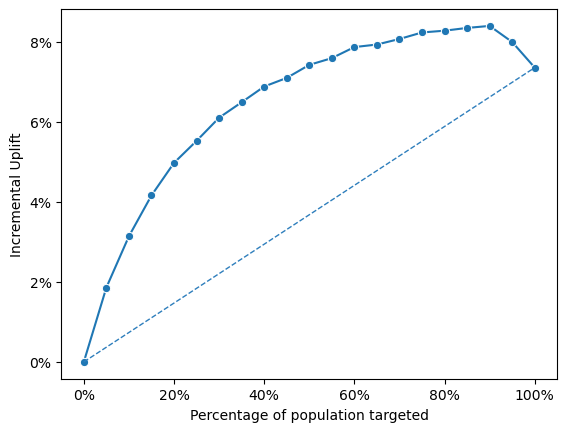

In [39]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt=20
)


**Interpretation:**\
This plot shows the incremental uplift as a function of the percentage of the population targeted. Detailed interpretation is as follows:
- The x-axis indicates the cumulative percentage of the population that has been targeted, starting from those most likely to be influenced by the campaign (left) to the least (right).
- The y-axis shows the incremental uplift, which is the increase in response due to the campaign.
- The curve increases sharply at first as more of the population is targeted, indicating that the campaign is more effective among the first groups targeted.
- The incremental uplift reaches a plateau, suggesting that beyond a certain point, targeting additional people does not substantially increase the campaign's effectiveness.
- After reaching its peak, the curve starts to decline slightly, implying that targeting more of the population might lead to diminishing returns or even negative effects.


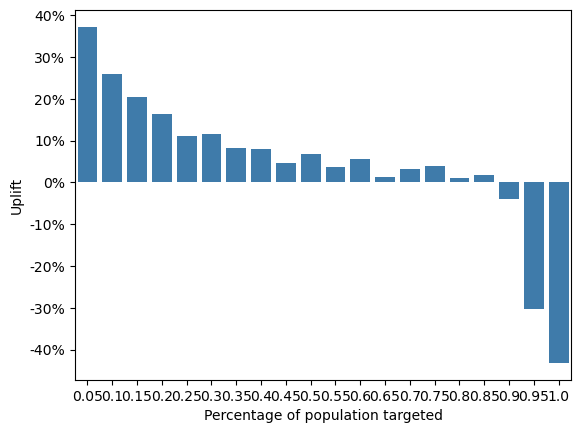

In [40]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt=20
)

**Interpretation:**\
This graph is a bar chart that represents the uplift by segments of the population targeted, which is derived from an uplift modeling analysis. Detailed interpretation of the graph:
- The x-axis segments the population into quantiles (or deciles, judging by the scale, which seems to go from 0.05 to 1.0 in increments of 0.05, indicating 20 segments or quintiles). Each segment represents a portion of the population ordered by the likelihood of being influenced by the campaign, from most likely to least likely.
- The y-axis represents the uplift, which is the incremental impact or improvement due to a marketing campaign or intervention, expressed as a percentage.
- The first few bars show a positive uplift, with the first bar showing the highest positive impact (over 30% uplift). This suggests that the campaign is very effective for the first 5% of the population targeted.
- As we move right along the x-axis, the size of the uplift decreases, which indicates that the campaign is less effective for each subsequent segment of the population.
- The bars eventually drop to 0% uplift, which means that in those segments, the campaign had no incremental effect.
- Towards the right end of the chart, the uplift becomes negative, which means that targeting these segments of the population could have a counterproductive effect, possibly deterring them from the desired action.

In [41]:
# Number of customers to target
target_customers = 30000

# Number of bins needed to cover 30,000 customers (since each bin has 900 customers)
bins_needed = target_customers / (120000 / 20)

# Incremental response for the 5th bin
incremental_response_bin_5 = tab_rf['incremental_resp'][4]

# Number of customers in the 5th bin
customers_in_bin_5 = 2250  # 25% of 9000

# Calculate the total incremental response for 30,000 customers
total_incremental_response_30k = incremental_response_bin_5 * (target_customers / customers_in_bin_5)

# Assuming a profit margin per incremental purchase
margin_per_purchase = 14.99 
cost = 30000 * 1.5

# Calculate the total expected incremental profit for 30,000 customers
total_incremental_profit_rf = total_incremental_response_30k * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_rf}")


Total expected incremental profit: 54366.32585009142


/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


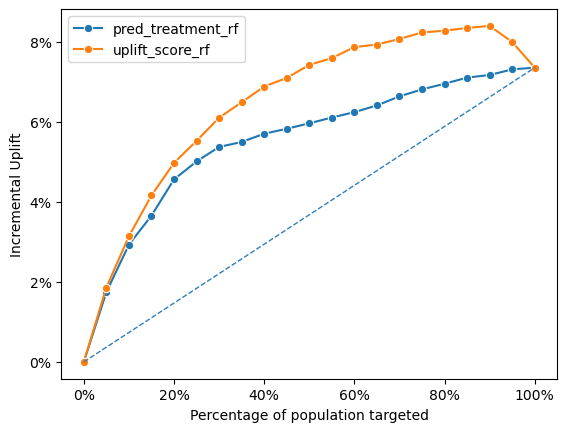

In [42]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_rf", "uplift_score_rf"],
    "ad",
    1,
    qnt = 20
)

**Interpretation:**

This graph is a cumulative uplift curve that compares two models for incremental uplift across different segments of the population targeted:
Explain the Incremental Uplift Plot:

- The x-axis represents the percentage of the population targeted, moving from 0% to 100%.
- The y-axis indicates the incremental uplift, reflecting the added value from targeting a given percentage of the population.
- Two lines are depicted in the plot:
- The blue line (pred_treatment_rf) indicates the treatment effect predicted by the random forest model (propensity model).
- The orange line (uplift_score_rf) shows the uplift score calculated by the random forest model.

Interpretation of the Plot:

- Initially, the propensity model (pred_treatment_rf) starts at a lower incremental uplift but shows a consistent increase, suggesting the model predicts a steady response across the entire population.
- The uplift score (uplift_score_rf) starts higher, signifying that the model is highly effective at identifying the most responsive individuals at the beginning.
- The uplift score line begins to plateau around the 80% mark, implying that targeting beyond this point brings diminishing returns.
- Both lines exhibit a plateauing trend, which is expected as targeting expands; beyond a certain point, the less responsive segments of the population are reached, leading to smaller incremental gains.

Calculation of Uplift and Incremental Uplift:

- Uplift (%) is the measured improvement in response due to the treatment compared to a control group.
- Incremental Uplift (%) represents the additional uplift obtained with each incremental targeting percentile.
- This analysis uses 20 segments to divide the population, providing a more detailed assessment than the usual 10 segments.

Comparing Performance Metrics:

- The more gradual increase of the pred_treatment_rf line suggests that the random forest model predicts a broader but less intense response to the treatment.
- The uplift_score_rf, which initially indicates a sharper response, suggests the model is particularly effective at identifying those most likely to respond well to the campaign in the early segments.
- The analysis indicates that for campaigns targeting a broad audience, the uplift score derived from the random forest model would help in identifying the most responsive segments up to a point, after which the predicted treatment effect would guide further targeting albeit with smaller expected gains.

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


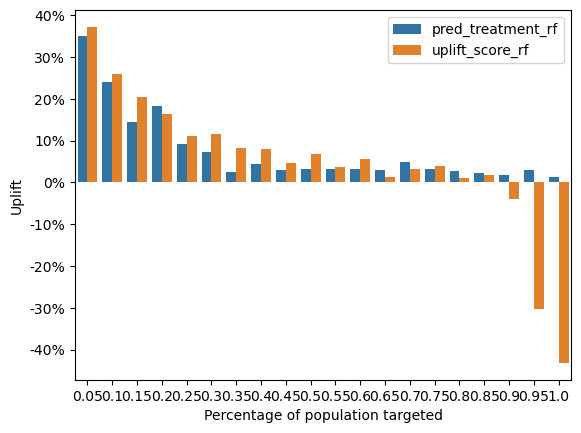

In [43]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_rf", "uplift_score_rf"],
    "ad",
    1,
    qnt = 20
)

**Interpretation:**\
Explain the Uplift Bar Chart:
- The x-axis categorizes the population into segments based on the percentage targeted, ranging from 5% to 100% of the population in increments, suggesting 20 equal segments.
- The y-axis measures the uplift, representing the percentage increase or decrease in the desired outcome due to the campaign for each segment.
- The chart displays two sets of bars for each segment:
- The blue bars (pred_treatment_rf) represent the predicted treatment effect according to the random forest model.
- The orange bars (uplift_score_rf) indicate the actual uplift score derived from the random forest model's predictions.

Interpretation of the Bar Chart:
- The first segment shows a substantial positive uplift for both the predicted treatment effect (propensity model) and the actual uplift score, indicating that the campaign is highly effective for this group.
- As we move to subsequent segments, there's a gradual decline in uplift for both metrics, with the predicted treatment effect generally presenting higher values than the actual uplift score, suggesting an overestimation of the treatment effect by the model.
- In the latter half of the segments, the uplift for both metrics flattens out and eventually turns negative, indicating that the campaign is ineffective or potentially counterproductive for these segments.
- The last segments exhibit a significant negative uplift, especially for the actual uplift score, which could imply that targeting these individuals may actually deter the desired outcome.

Comparison of Predicted vs. Actual Uplift:
- The predicted treatment effect tends to be more optimistic across all segments compared to the actual uplift score, which may suggest a need for calibration or a review of the model's predictive accuracy.
- The initial segments are where the campaign should focus its efforts, as indicated by both the predicted (propensity model) and actual uplift scores.
- The negative uplift in the later segments signals that further targeting may have an adverse effect, and resources should be redirected towards the more responsive early segments for maximum efficiency.

In [44]:
tab2_rf = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rf", "ad", 1, qnt=20
)
tab2_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_rf,1,0.05,211,449,73,608,157.090461,1.745450,0.349867
1,pred_treatment_rf,2,0.10,367,896,126,1094,263.804388,2.931160,0.239940
2,pred_treatment_rf,3,0.15,487,1345,181,1541,329.021415,3.655793,0.144218
3,pred_treatment_rf,4,0.20,608,1799,220,2004,410.504990,4.561167,0.182287
4,pred_treatment_rf,5,0.25,696,2240,269,2458,450.857608,5.009529,0.091617
5,pred_treatment_rf,6,0.30,775,2688,314,2896,483.552486,5.372805,0.073600
6,pred_treatment_rf,7,0.35,833,3150,360,3352,494.694511,5.496606,0.024664
7,pred_treatment_rf,8,0.40,892,3600,397,3774,513.303657,5.703374,0.043433
8,pred_treatment_rf,9,0.45,940,4017,428,4137,524.414793,5.826831,0.029708
9,pred_treatment_rf,10,0.50,990,4478,458,4525,536.757127,5.963968,0.031140


**Interpretation:**\
This table shows the uplift results calculated from the tuned random forest model for different segments of the population. The table contains the following columns:
- pred: Indicates the prediction model used, here labeled as pred_treatment_rf, suggesting it's the predicted treatment effect from a random forest model.
- bins: The number of bins or segments into which the population has been divided, here it is 20, providing a granular view.
- cum_prop: The cumulative proportion of the population, increasing from 5% to 100%.
- T_resp: The number of responders in the treatment group for each segment.
- T_n: The total number of individuals in the treatment group for each segment.
- C_resp: The number of responders in the control group for each segment.
- C_n: The total number of individuals in the control group for each segment.
- incremental_resp: The incremental response, calculated as the difference in responders between the treatment and control groups for each segment.
- inc_uplift: Incremental uplift, representing the incremental response as a percentage of the number of individuals in the treatment group for each segment.
- uplift: The uplift score, calculated as the difference in response rates between the treatment and control groups.

Interpreting the table:

- The uplift is highest in the first few bins and decreases as we progress through the segments, which is consistent with the bar chart where early segments showed higher uplift.
- The incremental_resp and inc_uplift values are highest at the beginning and taper off, indicating that the initial segments of the population are more responsive to the treatment.
- The uplift score follows a similar pattern, starting higher and decreasing across the bins, and aligns with the trend observed in the bar chart.

In [45]:
# Number of customers to target
target_customers = 30000

# Number of bins needed to cover 30,000 customers (since each bin has 900 customers)
bins_needed = target_customers / (120000 / 20)

# Incremental response for the 5th bin
incremental_response_bin_5 = tab2_rf['incremental_resp'][4]

# Number of customers in the 5th bin
customers_in_bin_5 = 2250  # 25% of 9000

# Calculate the total incremental response for 30,000 customers
total_incremental_response_30k = incremental_response_bin_5 * (target_customers / customers_in_bin_5)

# Assuming a profit margin per incremental purchase
margin_per_purchase = 14.99
cost = 30000 * 1.5

# Calculate the total expected incremental profit for 30,000 customers
total_incremental_profit_prop_rf = total_incremental_response_30k * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_prop_rf}")


Total expected incremental profit: 45111.407214537554


In [46]:
diff_rf = abs(total_incremental_profit_prop_rf - total_incremental_profit_rf)
diff_rf

9254.91863555387

In [47]:
print(diff, diff_rf)

13842.276826396352 9254.91863555387


## 8

__Repeat steps 2-6 using an XGBoost model. Tune the model on at least 3 hyper parameters. Do not use “early stopping” (10 points)__

In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


X_treatment, y_treatment = cg_ad_random.loc[:, "GameLevel":"UserHasOldOS"], cg_ad_random.loc[:, "converted"].map({'yes': 1, 'no': 0}).astype(int)
X_control, y_control = cg_organic_control.loc[:, "GameLevel":"UserHasOldOS"], cg_organic_control.loc[:, "converted"].map({'yes': 1, 'no': 0}).astype(int)

# Define the model
model_treatment = xgb.XGBClassifier(objective='binary:logistic', seed=123,enable_categorical=True)
model_control = xgb.XGBClassifier(objective='binary:logistic', seed=123,enable_categorical=True)


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 20],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1],
    'alpha': [0, 0.5, 1],
}

# Setup GridSearchCV
grid_search_treatment = GridSearchCV(estimator=model_treatment, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search_control = GridSearchCV(estimator=model_control, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Perform grid search
grid_search_treatment.fit(X_treatment, y_treatment)
grid_search_control.fit(X_control, y_control)



Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0, 0.5, 1], 'max_depth': [3, 5, 20],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1]},
             scoring='roc_auc', verbose=1)

In [49]:
# Best parameters and best score
print("Best Parameters:", grid_search_treatment.best_params_)
print("Best Score:", grid_search_treatment.best_score_)

Best Parameters: {'alpha': 1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best Score: 0.7787629587852418


In [50]:
# Best parameters and best score
print("Best Parameters:", grid_search_control.best_params_)
print("Best Score:", grid_search_control.best_score_)

Best Parameters: {'alpha': 1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best Score: 0.8797533073243496


In [51]:
xgb_model_treatment = grid_search_treatment.best_estimator_
xgb_model_control = grid_search_control.best_estimator_

In [52]:
print(cg_rct_stacked.columns)

Index(['converted', 'GameLevel', 'NumGameDays', 'NumGameDays4Plus',
       'NumInGameMessagesSent', 'NumSpaceHeroBadges',
       'NumFriendRequestIgnored', 'NumFriends', 'AcquiredSpaceship',
       'AcquiredIonWeapon', 'TimesLostSpaceship', 'TimesKilled',
       'TimesCaptain', 'TimesNavigator', 'PurchasedCoinPackSmall',
       'PurchasedCoinPackLarge', 'NumAdsClicked', 'DaysUser', 'UserConsole',
       'UserHasOldOS', 'ad', 'training', 'pred_treatment', 'pred_control',
       'uplift_score', 'pred_control_rf', 'pred_treatment_rf',
       'uplift_score_rf'],
      dtype='object')


In [53]:
features = ['GameLevel', 'NumGameDays', 'NumGameDays4Plus', 'NumInGameMessagesSent', 
            'NumSpaceHeroBadges', 'NumFriendRequestIgnored', 'NumFriends', 
            'AcquiredSpaceship', 'AcquiredIonWeapon', 'TimesLostSpaceship', 
            'TimesKilled', 'TimesCaptain', 'TimesNavigator', 'PurchasedCoinPackSmall', 
            'PurchasedCoinPackLarge', 'NumAdsClicked', 'DaysUser', 'UserConsole', 'UserHasOldOS']


In [54]:
# Getting the probability of the positive class (usually at index 1)
cg_rct_stacked['pred_control_xgb'] = xgb_model_control.predict_proba(cg_rct_stacked[features])[:, 1]
cg_rct_stacked['pred_treatment_xgb'] = xgb_model_treatment.predict_proba(cg_rct_stacked[features])[:, 1]

# Calculating uplift score based on the probabilities
cg_rct_stacked["uplift_score_xgb"] = (
    cg_rct_stacked['pred_treatment_xgb'] - cg_rct_stacked['pred_control_xgb']
)

cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,training,pred_treatment,pred_control,uplift_score,pred_control_rf,pred_treatment_rf,uplift_score_rf,pred_control_xgb,pred_treatment_xgb,uplift_score_xgb
0,no,7,18,0,124,0,81,0,yes,no,...,1.0,0.082031,0.018729,0.063302,0.004286,0.00875,0.004464,0.002294,0.009459,0.007165
1,no,10,3,2,60,0,18,479,no,no,...,1.0,0.186298,0.035720,0.150578,0.030000,0.22500,0.195000,0.025532,0.133527,0.107995
2,no,2,1,0,0,0,0,0,no,no,...,1.0,0.047125,0.012379,0.034746,0.000000,0.06000,0.060000,0.002172,0.019059,0.016887
3,no,2,11,1,125,0,73,217,no,no,...,0.0,0.092398,0.010224,0.082174,0.028571,0.20375,0.175179,0.017113,0.086644,0.069531
4,no,8,15,0,0,0,6,51,yes,no,...,1.0,0.307346,0.088581,0.218765,0.007143,0.24750,0.240357,0.030083,0.261545,0.231462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,5,1,0,0,0,0,0,no,no,...,0.0,0.115326,0.024719,0.090608,0.000000,0.03000,0.030000,0.003101,0.027146,0.024045
29996,no,9,12,0,78,0,59,1,yes,no,...,1.0,0.061149,0.012370,0.048779,0.017143,0.01750,0.000357,0.006396,0.053307,0.046911
29997,no,9,19,1,271,0,71,95,yes,no,...,1.0,0.062747,0.021071,0.041676,0.021429,0.04250,0.021071,0.005589,0.049738,0.044149
29998,no,10,23,0,76,6,20,107,no,no,...,0.0,0.140842,0.106917,0.033925,0.300000,0.18250,-0.117500,0.118132,0.127490,0.009357


In [55]:
tab_xgb = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt=20
)
tab_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_xgb,1,0.05,273,450,54,605,232.834711,2.587052,0.517410
1,uplift_score_xgb,2,0.10,428,900,81,1108,362.205776,4.024509,0.290767
2,uplift_score_xgb,3,0.15,554,1350,107,1666,467.295318,5.192170,0.233405
3,uplift_score_xgb,4,0.20,663,1800,134,2184,552.560440,6.139560,0.190099
4,uplift_score_xgb,5,0.25,744,2250,156,2714,614.670597,6.829673,0.138491
5,uplift_score_xgb,6,0.30,817,2700,170,3229,674.850728,7.498341,0.135038
6,uplift_score_xgb,7,0.35,877,3150,182,3711,722.513339,8.027926,0.108437
7,uplift_score_xgb,8,0.40,912,3600,196,4206,744.239658,8.269330,0.049495
8,uplift_score_xgb,9,0.45,945,4050,209,4721,765.705359,8.507837,0.048091
9,uplift_score_xgb,10,0.50,970,4500,226,5268,776.947608,8.632751,0.024477


**Interpretation:**\
This table displays the results from an uplift modeling analysis using a gradient boosting model, specifically XGBoost, to evaluate the effectiveness of a treatment or intervention across different segments of a population. Here's a detailed interpretation of the columns:

- pred: Indicates the model used, here labeled uplift_score_xgb, suggesting these are uplift scores derived from an XGBoost model.
- bins: Represents the number of bins or segments into which the population has been divided. There are 20 bins, providing a detailed segmentation.
- cum_prop: The cumulative proportion of the population included up to each bin, starting from the top 5% of the population likely to respond to the treatment and reaching 100%.
- T_resp: The number of individuals in the treatment group who responded positively.
- T_n: The total number of individuals in the treatment group for each segment.
- C_resp: The number of individuals in the control group who responded positively.
- C_n: The total number of individuals in the control group for each segment.
- incremental_resp: The incremental number of positive responses attributed to the treatment.
- inc_uplift: The incremental uplift percentage, which is the additional percentage of positive responses in the treatment group over the control group.
- uplift: The uplift score, which is the difference in response rates between the treatment and control groups.

Analysis of the data:
- The incremental_resp and inc_uplift are highest in the first few bins, indicating that the XGBoost model is very effective at identifying individuals who are most likely to be influenced by the treatment in these segments.
- As the bins progress towards the entire population (cum_prop reaching 1.00 or 100%), both incremental_resp and inc_uplift decrease, which suggests diminishing returns on the effectiveness of the treatment.
- Interestingly, in the last few bins, the inc_uplift and uplift become negative, indicating that the treatment might have an adverse effect, or that it is less effective than no treatment at all for these segments of the population.


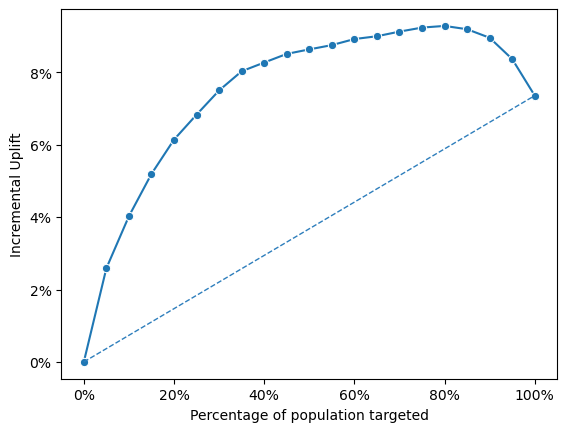

In [56]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt=20
)

**Interpret:**

The chart you've shared is an incremental uplift curve, which is used to visualize the effectiveness of a targeted treatment or intervention across different segments of a population. interpret the graph:
- The x-axis represents the percentage of the population targeted, which is segmented based on the predicted uplift score from the XGBoost model.
- The y-axis represents the incremental uplift, which is the increase in the conversion rate attributable to the treatment.

Key observations from the chart:
- The incremental uplift increases sharply as we start targeting the population, reaching a peak at around 60% of the population targeted. This suggests that the treatment is most effective for the top 60% of individuals as identified by the uplift modeling.
- Beyond the peak, the incremental uplift starts to decrease, indicating that including more of the population beyond this point results in lower marginal gains from the treatment.
- The curve starts to flatten and eventually would turn downward (not shown on this graph but could be implied from the trend), suggesting that targeting more than a certain percentage of the population could lead to less effectiveness or even negative effectiveness of the treatment.
- The dotted line might represent a baseline or random targeting scenario where the incremental uplift would increase linearly with the population targeted. This serves as a benchmark to show the value added by using the model for targeting.

The peak of the curve indicates the optimal point of targeting where the incremental uplift is maximized. This helps in decision-making about how much of the population to target to achieve the best results from the treatment. It reinforces a targeted approach, where interventions are focused on the segments that are most likely to respond, as opposed to a one-size-fits-all approach.

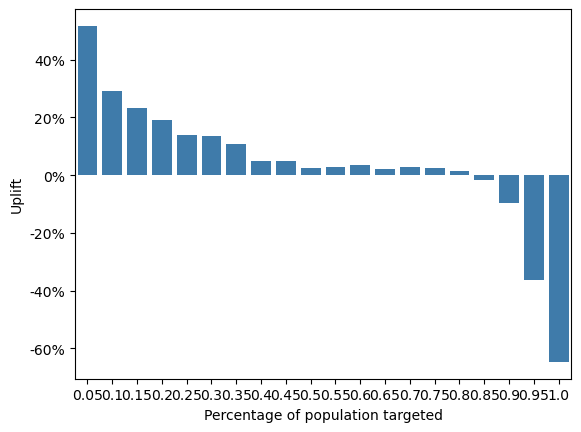

In [57]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt=20
)

**Interpretation:**\
The graph you've provided appears to be an uplift by decile chart. This kind of graph is used to evaluate the effectiveness of a predictive model in targeting interventions or treatments, with the following interpretations:
- The x-axis divides the population into deciles (10 equal parts) based on their predicted uplift score from the XGBoost model. It is ordered from the highest predicted uplift to the lowest.
- The y-axis shows the uplift percentage, which measures the improvement in outcome due to the treatment.
- Each bar corresponds to a decile of the population and shows the uplift achieved by targeting that decile.

Looking at the chart:

- The first few deciles show positive uplift, which means that targeting these groups with the intervention is beneficial and results in a higher conversion rate.
- As you move from left to right (from higher to lower predicted uplift), the uplift decreases. This suggests that the model is effective in ranking individuals according to their likelihood to be positively influenced by the treatment.
- The last few deciles have a negative uplift, implying that targeting these groups could be counterproductive. It might mean that the intervention may have an adverse effect on these individuals or simply that it would be a waste of resources.


In [58]:
# Number of customers to target
target_customers = 30000

# Number of bins needed to cover 30,000 customers (since each bin has 900 customers)
bins_needed = target_customers / (120000 / 20)

# Incremental response for the 5th bin
incremental_response_bin_5 = tab_xgb['incremental_resp'][4]

# Number of customers in the 5th bin
customers_in_bin_5 = 2250  # 25% of 9000

# Calculate the total incremental response for 30,000 customers
total_incremental_response_30k = incremental_response_bin_5 * (target_customers / customers_in_bin_5)

# Assuming a profit margin per incremental purchase
margin_per_purchase = 14.99 
cost = 30000 * 1.5

# Calculate the total expected incremental profit for 30,000 customers
total_incremental_profit_xgb = total_incremental_response_30k * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_xgb}")


Total expected incremental profit: 77852.16330140016


/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


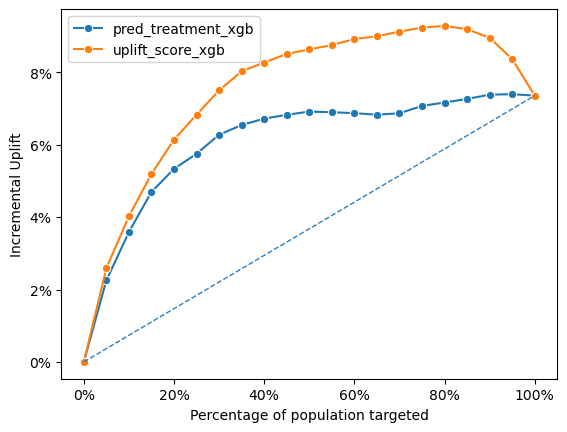

In [59]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_xgb", "uplift_score_xgb"],
    "ad",
    1,
    qnt = 20
)

**Interpretation:**

The graph provided is an incremental uplift plot that compares the performance of two models in an uplift modeling analysis:

- The x-axis represents the percentage of the population targeted, ranging from 0% to 100%.
- The y-axis shows the incremental uplift, which indicates the additional response or conversion rate achieved due to the treatment, as identified by the model.

In the plot, two curves are presented:

- The blue curve (pred_treatment_xgb) represents the predicted treatment effect from the XGBoost model (propensity model).
- The orange curve (uplift_score_xgb) represents the actual uplift score calculated from the XGBoost model's predictions.

Key observations:

- Both curves show an increasing trend as more of the population is targeted, indicating that the treatment is effective up to a certain point.
- The propensity model shows a sharp increase and then starts to plateau, suggesting that the initial segments of the population are most responsive to the treatment.
- The actual uplift score curve increases steadily, overtaking the predicted treatment effect curve(propensity model), indicating that the actual responses are slightly better than what the model predicted, especially as the percentage of the population targeted grows.
- The actual uplift score curve begins to plateau after reaching about 60-80% of the population, suggesting that targeting beyond this point may not yield significantly higher returns.
- The dotted line likely represents the baseline or what would be expected if the population was targeted at random without using the model. Both curves are well above this line, indicating that the XGBoost model is providing significant value in targeting the right individuals.


/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


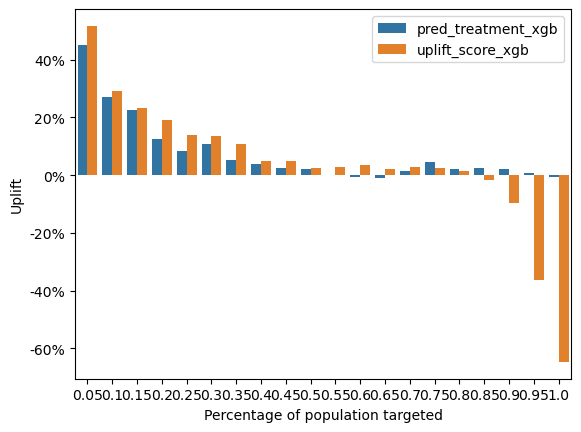

In [60]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_xgb", "uplift_score_xgb"],
    "ad",
    1,
    qnt = 20
)

**Interpretation:**

This graph is a bar chart that compares two different models of uplift across different segments of the population targeted by a treatment:

- The x-axis represents the percentage of the population targeted, segmented into quantiles (from 0% to 100%).
- The y-axis represents the uplift, which is the incremental impact of the treatment over the control group, measured in percentage points.

There are two sets of bars representing two different metrics:

- The blue bars (pred_treatment_xgb) represent the predicted uplift by the XGBoost (propensity)model for each segment of the population.
- The orange bars (uplift_score_xgb) represent the uplift score calculated by uplift model for each segment based on the XGBoost model's predictions.

Key observations:

- For the initial segments (from 0% to around 20%), both the propensity and actual uplifts are positive, with the predicted uplift being higher than the actual uplift. This suggests that the model overestimated the impact of the treatment in these segments.
- As we move towards targeting a higher percentage of the population, both the propensity and actual uplifts tend to decrease.
- Notably, there are segments where the actual uplift is negative (below 0% on the y-axis), which means that in those segments, the treatment had a detrimental effect compared to the control group. This is especially evident in segments beyond 50% of the population targeted.
- In the last segments (around 90% to 100%), the propensity uplift is slightly positive or around zero, whereas the actual uplift is significantly negative. This suggests that the model failed to predict the detrimental impact of the treatment on these segments.
- The overall trend suggests that the treatment is beneficial only for a select portion of the population (approximately the first 20% to 30%), and beyond that, the treatment either has no significant effect or could potentially have a negative impact.

In [61]:
tab2_xgb = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb", "ad", 1, qnt=20
)
tab2_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_xgb,1,0.05,270,450,88,587,202.538330,2.250426,0.450085
1,pred_treatment_xgb,2,0.10,438,900,136,1063,322.854186,3.587269,0.272493
2,pred_treatment_xgb,3,0.15,571,1350,170,1546,422.552393,4.695027,0.225162
3,pred_treatment_xgb,4,0.20,678,1800,221,2007,479.793722,5.331041,0.127149
4,pred_treatment_xgb,5,0.25,773,2250,279,2457,517.505495,5.750061,0.082222
5,pred_treatment_xgb,6,0.30,858,2700,314,2892,564.846473,6.276072,0.108429
6,pred_treatment_xgb,7,0.35,920,3150,354,3367,588.814969,6.542389,0.053567
7,pred_treatment_xgb,8,0.40,968,3600,383,3797,604.871214,6.720791,0.039225
8,pred_treatment_xgb,9,0.45,1009,4050,409,4197,614.325232,6.825836,0.026111
9,pred_treatment_xgb,10,0.50,1043,4500,432,4621,622.311837,6.914576,0.021310


**Interpretation:**

The table in the image presents detailed results from an uplift modeling analysis using an XGBoost model. The analysis is broken down by segments (bins) of the population targeted by a treatment or campaign:

- pred: Indicates the prediction set, here it's the treatment effect predicted by the XGBoost model.
- bins: Shows 20 bins, indicating the population has been divided into 20 equal segments based on the predicted uplift score.
- cum_prop: The cumulative proportion of the population in each bin, starting from the top 5% and going up to 100%.
- T_resp: The number of positive responses (people who "converted") in the treatment group within each bin.
- T_n: The total number of people in the treatment group for each bin.
- C_resp: The number of positive responses in the control group for each bin.
- C_n: The total number of people in the control group for each bin.
- incremental_resp: The difference in the number of positive responses between the treatment and control groups, which is the additional number of responses attributed to the treatment.
- inc_uplift: The incremental uplift, which is the incremental_resp expressed as a percentage of T_n, representing the additional response rate due to the treatment.
- uplift: The uplift score, calculated as the difference in response rates between the treatment and control groups across each bin.

Interpreting the data:

- The incremental_resp and inc_uplift show that the treatment has a positive impact on the early segments of the population, with diminishing returns as more of the population is targeted.
- The uplift starts positive and generally decreases with each bin, indicating that the most significant impact of the treatment is on the top segments of the population. Notably, uplift becomes negative in the last two bins, suggesting that targeting those segments could have a detrimental effect.
- The table reflects that the top segments (approximately the first 10 bins, covering up to 50% of the population) are where the treatment is most effective, aligning with the optimal targeting range suggested by the previous incremental uplift curve.

This detailed breakdown is useful for deciding how to allocate resources for a campaign effectively. It indicates that focusing the treatment on the top 50% of the population, as ranked by the XGBoost model, would likely yield the best results. Beyond that point, the treatment's effectiveness drops, and eventually, the model indicates a negative impact, suggesting that the campaign or treatment should not be extended to those individuals.

In [62]:
# Number of customers to target
target_customers = 30000

# Number of bins needed to cover 30,000 customers (since each bin has 900 customers)
bins_needed = target_customers / (120000 / 20)

# Incremental response for the 5th bin
incremental_response_bin_5 = tab2_xgb['incremental_resp'][4]

# Number of customers in the 5th bin
customers_in_bin_5 = 2250  # 25% of 9000

# Calculate the total incremental response for 30,000 customers
total_incremental_response_30k = incremental_response_bin_5 * (target_customers / customers_in_bin_5)

# Assuming a profit margin per incremental purchase
margin_per_purchase = 14.99
cost = 30000 * 1.5

# Calculate the total expected incremental profit for 30,000 customers
total_incremental_profit_prop_xgb = total_incremental_response_30k * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_prop_xgb}")


Total expected incremental profit: 58432.09816849818


In [63]:
diff_xgb = abs(total_incremental_profit_prop_xgb - total_incremental_profit_xgb)
diff_xgb

19420.065132901975

In [64]:
comparsion = pd.DataFrame({ 
    'model': [ 'Logistic Regression uplift','Logistic Regression prop' ,'Random Forest uplift', 'Random Forest prop', 'xgb uplift', 'xgb prop'],
    'total_incremental_profit': [total_incremental_profit, total_incremental_profit_prop, total_incremental_profit_rf, total_incremental_profit_prop_rf, total_incremental_profit_xgb, total_incremental_profit_prop_xgb],
    'pred variable':['uplift_score', 'pred_treatment', 'uplift_score_rf', 'pred_treatment_rf', 'uplift_score_xgb', 'pred_treatment_xgb'],
    'diff': [diff, diff, diff_rf,diff_rf, diff_xgb, diff_xgb]
    })
comparsion

,model,total_incremental_profit,pred variable,diff
0,Logistic Regression uplift,45907.759762,uplift_score,13842.276826
1,Logistic Regression prop,32065.482935,pred_treatment,13842.276826
2,Random Forest uplift,54366.325850,uplift_score_rf,9254.918636
3,Random Forest prop,45111.407215,pred_treatment_rf,9254.918636
4,xgb uplift,77852.163301,uplift_score_xgb,19420.065133
5,xgb prop,58432.098168,pred_treatment_xgb,19420.065133


In [100]:
comparison = pd.DataFrame({ 
    'model': ['Logistic Regression', 'Logistic Regression', 'Random Forest', 'Random Forest', 'XGB', 'XGB'],
    'model_type': ['Uplift', 'Propensity', 'Uplift', 'Propensity', 'Uplift', 'Propensity'],
    'total_incremental_profit': [total_incremental_profit, total_incremental_profit_prop, total_incremental_profit_rf, total_incremental_profit_prop_rf, total_incremental_profit_xgb, total_incremental_profit_prop_xgb],
    'pred_variable':['uplift_score', 'pred_treatment', 'uplift_score_rf', 'pred_treatment_rf', 'uplift_score_xgb', 'pred_treatment_xgb'],
    'diff': [diff, diff, diff_rf, diff_rf, diff_xgb, diff_xgb]
})

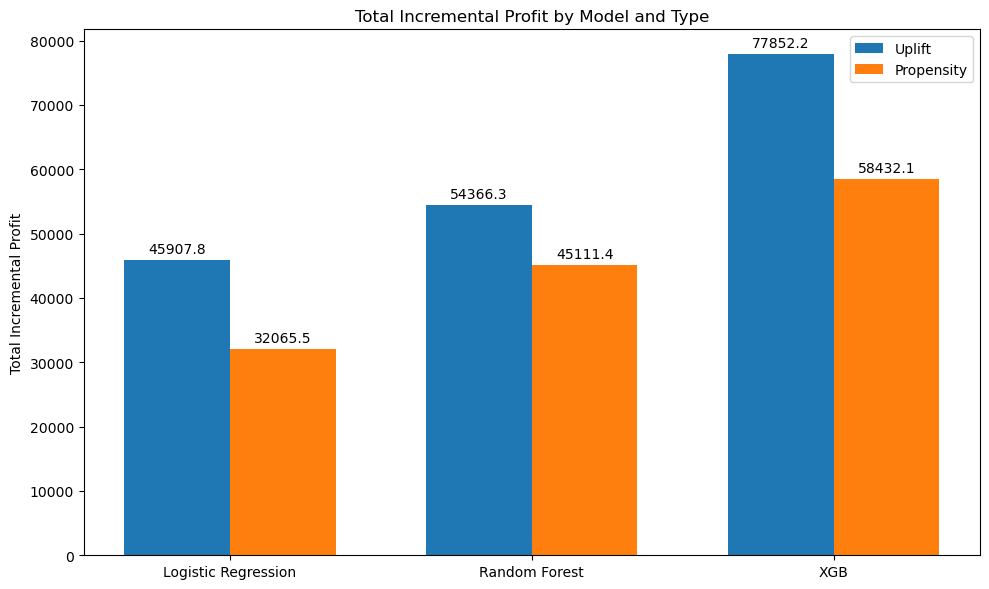

In [101]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
models = comparison['model'].unique()
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, comparison[comparison['model_type'] == 'Uplift']['total_incremental_profit'], width, label='Uplift')
rects2 = ax.bar(x + width/2, comparison[comparison['model_type'] == 'Propensity']['total_incremental_profit'], width, label='Propensity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Incremental Profit')
ax.set_title('Total Incremental Profit by Model and Type')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Part 2

**So far we have targeted 25% of model-selected customers by picking the best 30,000 out of the set of 120,000 customers. Determine if more or less than 25% of customers should be targeted.**

In [98]:
len(cg_rct_stacked['training']==0)

60000

In [65]:
revenue_per_conversion = 14.99
ad_cost_per_customer = 1.50
break_even = ad_cost_per_customer / revenue_per_conversion
treatment_test = cg_rct_stacked.query("training == 0 & ad == 1")

## 1

__What formula would you use to select customers to target using a propensity model if your goal is to maximize profits? What percentage of customers in the ad treatment test set in cg_rct_stacked would you target based on the propensity model? (3 points)__

In [66]:
treatment_test['target_logistic'] = treatment_test['pred_treatment'] > break_even
target_logistic = treatment_test['target_logistic'].sum()
target_logistic_prop = target_logistic / len(treatment_test)
print(f"percentage of customers to target using prop model: {target_logistic_prop}")

percentage of customers to target using prop model: 0.47988888888888886


/tmp/ipykernel_14852/2905037157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_test['target_logistic'] = treatment_test['pred_treatment'] > break_even


## 2

__What formula would you use to select customers to target using an uplift model if your goal is to maximize incremental profits? What percentage of customers in the ad treatment test set in cg_rct_stacked would you target based on the uplift model? (3 points)__

In [67]:

# Calculate net profit for each customer
treatment_test["net_profit"] = (treatment_test["uplift_score"] * revenue_per_conversion) - ad_cost_per_customer

# Sort customers by net profit in descending order
sorted_customers = treatment_test.sort_values(by="net_profit", ascending=False)

# Select customers to target where net profit is positive
customers_to_target = sorted_customers[sorted_customers["net_profit"] > 0]

# Calculate the percentage of customers to target
target_logistic_uplift = (len(customers_to_target) / len(treatment_test))

target_logistic_uplift


/tmp/ipykernel_14852/320399632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_test["net_profit"] = (treatment_test["uplift_score"] * revenue_per_conversion) - ad_cost_per_customer


0.21933333333333332

## 3

__Rounding the targeting percentage numbers you calculated in 1. and 2. to the nearest 5%, use the uplift table you created for the propensity and uplift models in Part I to calculate the incremental profits you would have obtained in the test set in cg_rct_stacked dataset if you had targeted the optimal percentage of customers suggested by each model. (2 points)__

In [68]:
def round_to_nearest_5_percent(value):
    return round(value * 20) / 20

In [69]:
target_logistic_prop = round_to_nearest_5_percent(target_logistic_prop)
target_logistic_uplift = round_to_nearest_5_percent(target_logistic_uplift)
print(f"percentage of customers to target using uplift model: {target_logistic_uplift}")
print(f"percentage of customers to target using prop model: {target_logistic_prop}")

percentage of customers to target using uplift model: 0.2
percentage of customers to target using prop model: 0.5


In [70]:
test_set = cg_rct_stacked.query("training == 0")
len(test_set)

18000

In [71]:
tab_prop

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment,1,0.05,204,450,80,603,144.298507,1.603317,0.320663
1,pred_treatment,2,0.10,326,900,112,1131,236.875332,2.631948,0.210505
2,pred_treatment,3,0.15,430,1350,159,1605,296.261682,3.291796,0.131955
3,pred_treatment,4,0.20,525,1800,206,1994,339.042126,3.767135,0.090288
4,pred_treatment,5,0.25,615,2250,239,2344,385.584471,4.284272,0.105714
5,pred_treatment,6,0.30,672,2700,285,2807,397.863912,4.420710,0.027315
6,pred_treatment,7,0.35,726,3150,316,3162,411.199241,4.568880,0.032676
7,pred_treatment,8,0.40,775,3600,336,3603,439.279767,4.880886,0.063537
8,pred_treatment,9,0.45,813,4050,361,4044,451.464392,5.016271,0.027755
9,pred_treatment,10,0.50,838,4500,386,4527,454.302187,5.047802,0.003796


In [160]:
# uplift model
target_customers = 9000 * 0.2
incremental_response_logit_uplift = tab['incremental_resp'][3]
incremental_response_rate_logit_uplift = incremental_response_logit_uplift / target_customers

scaled_target_customers = 18000 * 0.2
incremental_response_logit_uplift = scaled_target_customers * incremental_response_rate_logit_uplift
margin_per_purchase = 14.99
cost = scaled_target_customers * 1.5

total_incremental_profit_logit_uplift= incremental_response_logit_uplift * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_logit_uplift}")


Total expected incremental profit: 6658.162758620689


In [161]:
# prop model
target_customers = 9000 * 0.5
incremental_response_logit_prop = tab_prop['incremental_resp'][9]
incremental_response_rate_logit_prop = incremental_response_logit_prop / target_customers

scaled_target_customers = 18000 * 0.5
incremental_response_logit_prop = scaled_target_customers * incremental_response_rate_logit_prop
margin_per_purchase = 14.99
cost = scaled_target_customers * 1.5

total_incremental_profit_logit_prop = incremental_response_logit_prop * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_logit_prop}")


Total expected incremental profit: 119.97956262425396


## 4

__Repeat steps 1-4 based on predictions from the Random Forest model (6 points)__

In [162]:
treatment_test['target_rf_prop'] = treatment_test['pred_treatment_rf'] > break_even
target_rf = treatment_test['target_rf_prop'].sum()
target_rf_prop = target_rf / len(treatment_test)
print(f"percentage of customers to target using prop model: {target_rf_prop}")

percentage of customers to target using prop model: 0.5083333333333333


/tmp/ipykernel_14852/1839428196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_test['target_rf_prop'] = treatment_test['pred_treatment_rf'] > break_even


In [163]:

# Calculate net profit for each customer
treatment_test["net_profit_rf_uplift"] = (treatment_test["uplift_score_rf"] * revenue_per_conversion) - ad_cost_per_customer

# Sort customers by net profit in descending order
sorted_customers = treatment_test.sort_values(by="net_profit_rf_uplift", ascending=False)

# Select customers to target where net profit is positive
customers_to_target = sorted_customers[sorted_customers["net_profit_rf_uplift"] > 0]

# Calculate the percentage of customers to target
target_rf_uplift = (len(customers_to_target) / len(treatment_test))

target_rf_uplift


/tmp/ipykernel_14852/3571041557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_test["net_profit_rf_uplift"] = (treatment_test["uplift_score_rf"] * revenue_per_conversion) - ad_cost_per_customer


0.30877777777777776

In [164]:
target_rf_prop = round_to_nearest_5_percent(target_rf_prop)
target_rf_uplift = round_to_nearest_5_percent(target_rf_uplift)
print(f"percentage of customers to target using uplift model: {target_rf_uplift}")
print(f"percentage of customers to target using prop model: {target_rf_prop}")

percentage of customers to target using uplift model: 0.3
percentage of customers to target using prop model: 0.5


In [165]:
# uplift model
target_customers = 9000 * target_rf_uplift
incremental_response_rf_uplift = tab['incremental_resp'][5]
incremental_response_rate_rf_uplift = incremental_response_rf_uplift / target_customers


scaled_target_customers = 18000 * target_rf_uplift
incremental_response_rf_uplift = scaled_target_customers * incremental_response_rate_rf_uplift
margin_per_purchase = 14.99
cost = scaled_target_customers * 1.5

total_incremental_profit_rf_uplift= incremental_response_rf_uplift * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_rf_uplift}")


Total expected incremental profit: 6444.582857142856


In [166]:
# prop model
target_customers = 9000 * target_rf_prop
incremental_response_rf_prop = tab2_rf['incremental_resp'][9]
incremental_response_rate_rf_prop = incremental_response_rf_prop / target_customers

scaled_target_customers = 18000 * target_rf_prop
incremental_response_rf_prop = scaled_target_customers * incremental_response_rate_rf_prop
margin_per_purchase = 14.99
cost = scaled_target_customers * 1.5

total_incremental_profit_rf_prop= incremental_response_rf_prop * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_rf_prop}")


Total expected incremental profit: 2591.9786696132596


## 5

__Repeat steps 1-4 based on predictions from the XGBoost model (6 points)__

In [167]:
treatment_test['target_xgb_prop'] = treatment_test['pred_treatment_xgb'] > break_even
target_xgb = treatment_test['target_xgb_prop'].sum()
target_xgb_prop = target_xgb / len(treatment_test)
print(f"percentage of customers to target using prop model: {target_xgb_prop}")

percentage of customers to target using prop model: 0.4771111111111111


/tmp/ipykernel_14852/3643777589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_test['target_xgb_prop'] = treatment_test['pred_treatment_xgb'] > break_even


In [168]:

# Calculate net profit for each customer
treatment_test["net_profit_xgb_uplift"] = (treatment_test["uplift_score_xgb"] * revenue_per_conversion) - ad_cost_per_customer

# Sort customers by net profit in descending order
sorted_customers = treatment_test.sort_values(by="net_profit_xgb_uplift", ascending=False)

# Select customers to target where net profit is positive
customers_to_target = sorted_customers[sorted_customers["net_profit_xgb_uplift"] > 0]

# Calculate the percentage of customers to target
target_xgb_uplift = (len(customers_to_target) / len(treatment_test))

target_xgb_uplift


/tmp/ipykernel_14852/644564308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_test["net_profit_xgb_uplift"] = (treatment_test["uplift_score_xgb"] * revenue_per_conversion) - ad_cost_per_customer


0.2891111111111111

In [169]:
target_xgb_prop = round_to_nearest_5_percent(target_xgb_prop)
target_xgb_uplift = round_to_nearest_5_percent(target_xgb_uplift)
print(f"percentage of customers to target using uplift model: {target_xgb_uplift}")
print(f"percentage of customers to target using prop model: {target_xgb_prop}")

percentage of customers to target using uplift model: 0.3
percentage of customers to target using prop model: 0.5


In [170]:
# uplift model
target_customers = 9000 * target_xgb_uplift
incremental_response_xgb_uplift = tab_xgb['incremental_resp'][5]
incremental_response_rate_xgb_uplift = incremental_response_xgb_uplift / target_customers

scaled_target_customers = 18000 * target_xgb_uplift
incremental_response_xgb_uplift = scaled_target_customers * incremental_response_rate_xgb_uplift
margin_per_purchase = 14.99
cost = scaled_target_customers * 1.5

total_incremental_profit_xgb_uplift= incremental_response_xgb_uplift * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_xgb_uplift}")


Total expected incremental profit: 12132.024818829363


In [171]:
# prop model
target_customers = 9000 * target_xgb_prop
incremental_response_xgb_prop = tab2_xgb['incremental_resp'][9]
incremental_response_rate_xgb_prop = incremental_response_xgb_prop / target_customers

scaled_target_customers = 18000 * target_xgb_prop
incremental_response_xgb_prop = scaled_target_customers * incremental_response_rate_xgb_prop
margin_per_purchase = 14.99
cost = scaled_target_customers * 1.5

total_incremental_profit_xgb_prop= incremental_response_xgb_prop * margin_per_purchase - cost

print(f"Total expected incremental profit: {total_incremental_profit_xgb_prop}")


Total expected incremental profit: 5156.908881194548


In [172]:
comparsion2 = pd.DataFrame({
    'model': ['Logistic Regression uplift','Logistic Regression prop' ,'Random Forest uplift', 'Random Forest prop', 'xgb uplift', 'xgb prop'],
    'total_incremental_profit': [total_incremental_profit_logit_uplift, total_incremental_profit_logit_prop, total_incremental_profit_rf_uplift, total_incremental_profit_rf_prop, total_incremental_profit_xgb_uplift, total_incremental_profit_xgb_prop]
    })
comparsion2

,model,total_incremental_profit
0,Logistic Regression uplift,6658.162759
1,Logistic Regression prop,119.979563
2,Random Forest uplift,6444.582857
3,Random Forest prop,2591.978670
4,xgb uplift,12132.024819
5,xgb prop,5156.908881


## 6

__Give two reasons why one model performs better than the other on incremental profit when the optimal percentage of customers is selected for each model (4 points)__

**In our profit graph we see that the uplift models seem to perform better than the propensity models across all three algorithms in terms of incremental profit.**

**This could be due to**

**1.the uplift models' direct focus on the change in probability due to the treatment, which is the key factor when deciding whom to target for maximum incremental profit.The specific performance of XGBoost over Random Forest or Logistic Regression might be attributed to its powerful ensemble method that combines multiple weak predictive models to produce a strong predictive model.Furthermore, XGBoost's ability to handle various types of feature relationships and its effective utilization of system resources (like parallel processing) often lead to superior model performance on a wide range of tasks, including uplift modeling where the goal is to maximize incremental profit.**

**2.When considering incremental profits, it's also crucial to factor in the costs associated with the model predictions (e.g., ad costs per customer), as these can significantly impact the net profit calculation. If one model results in slightly higher prediction accuracy but significantly higher costs, it may end up less profitable than a model with slightly lower prediction accuracy but much lower costs. This is why the uplift model, which inherently accounts for the incremental gain over the cost, might be more advantageous in such scenarios.**

In [173]:
comparsion_prop = pd.DataFrame({
    'model': ['Logistic Regression', 'Logistic Regression', 'Random Forest', 'Random Forest', 'XGB', 'XGB'],
    'model_type': ['Uplift', 'Propensity', 'Uplift', 'Propensity', 'Uplift', 'Propensity'],
    'target proportion': [target_logistic_uplift, target_logistic_prop, target_rf_uplift, target_rf_prop, target_xgb_uplift, target_xgb_prop]
})
comparsion_prop

,model,model_type,target proportion
0,Logistic Regression,Uplift,0.2
1,Logistic Regression,Propensity,0.5
2,Random Forest,Uplift,0.3
3,Random Forest,Propensity,0.5
4,XGB,Uplift,0.3
5,XGB,Propensity,0.5


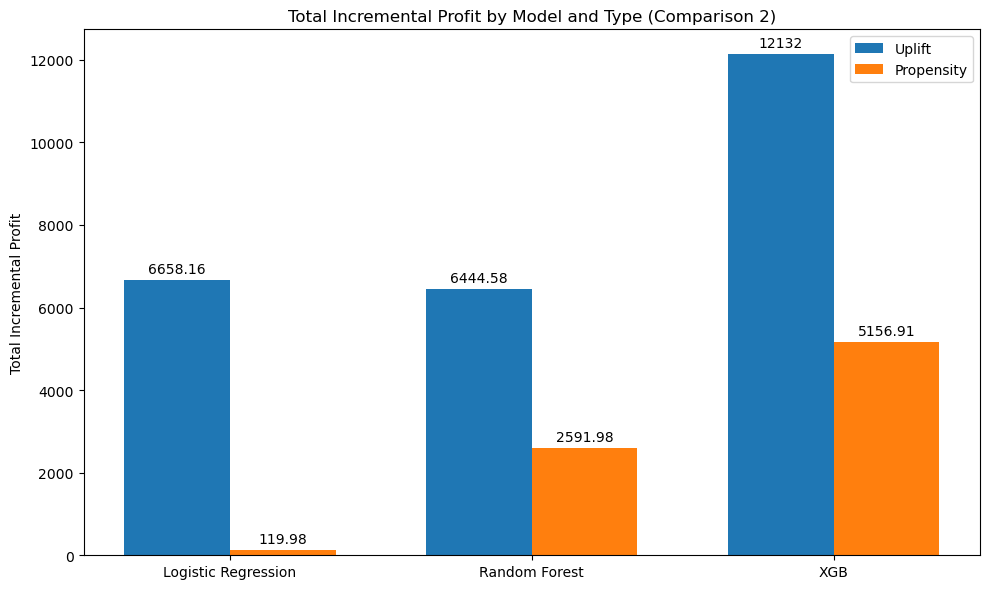

In [174]:
# DataFrame setup for comparison2
comparison2 = pd.DataFrame({
    'model': ['Logistic Regression', 'Logistic Regression', 'Random Forest', 'Random Forest', 'XGB', 'XGB'],
    'model_type': ['Uplift', 'Propensity', 'Uplift', 'Propensity', 'Uplift', 'Propensity'],
    'total_incremental_profit': [total_incremental_profit_logit_uplift, total_incremental_profit_logit_prop, total_incremental_profit_rf_uplift, total_incremental_profit_rf_prop, total_incremental_profit_xgb_uplift, total_incremental_profit_xgb_prop],
    'diff': [total_incremental_profit_logit_uplift - total_incremental_profit_logit_prop, total_incremental_profit_logit_uplift - total_incremental_profit_logit_prop, total_incremental_profit_rf_uplift - total_incremental_profit_rf_prop, total_incremental_profit_rf_uplift - total_incremental_profit_rf_prop, total_incremental_profit_xgb_uplift - total_incremental_profit_xgb_prop, total_incremental_profit_xgb_uplift - total_incremental_profit_xgb_prop]
})

# Plotting for comparison2
fig, ax = plt.subplots(figsize=(10, 6))
models2 = comparison2['model'].unique()
x2 = np.arange(len(models2))  # the label locations

rects1_2 = ax.bar(x2 - width/2, comparison2[comparison2['model_type'] == 'Uplift']['total_incremental_profit'], width, label='Uplift')
rects2_2 = ax.bar(x2 + width/2, comparison2[comparison2['model_type'] == 'Propensity']['total_incremental_profit'], width, label='Propensity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Incremental Profit')
ax.set_title('Total Incremental Profit by Model and Type (Comparison 2)')
ax.set_xticks(x2)
ax.set_xticklabels(models2)
ax.legend()

ax.bar_label(rects1_2, padding=3)
ax.bar_label(rects2_2, padding=3)

fig.tight_layout()

plt.show()

In [175]:
comparsion_prop = pd.DataFrame({
    'model': ['Logistic Regression', 'Logistic Regression', 'Random Forest', 'Random Forest', 'XGB', 'XGB'],
    'model_type': ['Uplift', 'Propensity', 'Uplift', 'Propensity', 'Uplift', 'Propensity'],
    'target proportion': [target_logistic_uplift, target_logistic_prop, target_rf_uplift, target_rf_prop, target_xgb_uplift, target_xgb_prop]
})
comparsion_prop

,model,model_type,target proportion
0,Logistic Regression,Uplift,0.2
1,Logistic Regression,Propensity,0.5
2,Random Forest,Uplift,0.3
3,Random Forest,Propensity,0.5
4,XGB,Uplift,0.3
5,XGB,Propensity,0.5


### Part 3:

Please see the pdf file for detailed answers.